In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/5Animals"

In [5]:
#Augmentation  --> im
img_data_generator = ImageDataGenerator(

    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,           #normalization - divide each pixels into 255
    validation_split=0.2,
)


train_dataset = img_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    #save_to_dir="/content/drive/MyDrive/aug" ,
    subset="training",
    target_size=(224,224)
)

validation_dataset = img_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 1045 images belonging to 5 classes.
Found 258 images belonging to 5 classes.


In [6]:
model = tf.keras.models.Sequential([
    # stride = number of pixels movement in hovering kernel = گام حرکت
    #Feature Extraction
    tf.keras.layers.Conv2D( filters=64 , kernel_size=(3,3) , strides=(2,2) , activation="relu" , padding="same" , input_shape=(224,224,3) ), # 128 ta filtere 3*3 dare vgg16
    tf.keras.layers.Conv2D( filters=64 , kernel_size=(3,3) , strides=(2,2) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D( filters=128 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    tf.keras.layers.Conv2D( filters=128 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    tf.keras.layers.MaxPooling2D(),

    # tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    # tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    # tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    # tf.keras.layers.MaxPooling2D(),

    # tf.keras.layers.Conv2D( filters=512 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    # tf.keras.layers.Conv2D( filters=512 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    # tf.keras.layers.Conv2D( filters=512 , kernel_size=(3,3) , strides=(1,1) , activation="relu" , padding="same"), # 128 ta filtere 3*3 dare vgg16
    # tf.keras.layers.MaxPooling2D() ,

    # Feature Array
    tf.keras.layers.Flatten(),

    #tf.keras.layers.Dense(4096 , activation="relu"),
    tf.keras.layers.Dense(128 , activation="relu"),
    tf.keras.layers.Dense(5    , activation="softmax")
    ])

In [7]:
model.compile(optimizer= "adamax" , loss= tf.keras.losses.categorical_crossentropy , metrics="accuracy")

# train_dataset contains x_train & y_train
history = model.fit(train_dataset , validation_data=validation_dataset , epochs=90)
# train and evaluation in parallel mode



Epoch 1/90
33/33 [==============================] - 36s 939ms/step - loss: 1.6034 - accuracy: 0.2182 - val_loss: 1.5933 - val_accuracy: 0.2054
Epoch 2/90
33/33 [==============================] - 30s 929ms/step - loss: 1.5802 - accuracy: 0.2593 - val_loss: 1.5394 - val_accuracy: 0.2907
Epoch 3/90
33/33 [==============================] - 30s 929ms/step - loss: 1.4928 - accuracy: 0.3263 - val_loss: 1.4197 - val_accuracy: 0.3488
Epoch 4/90
33/33 [==============================] - 30s 920ms/step - loss: 1.4269 - accuracy: 0.3522 - val_loss: 1.3871 - val_accuracy: 0.3682
Epoch 5/90
33/33 [==============================] - 32s 970ms/step - loss: 1.4225 - accuracy: 0.3435 - val_loss: 1.3492 - val_accuracy: 0.3953
Epoch 6/90
33/33 [==============================] - 35s 1s/step - loss: 1.3874 - accuracy: 0.3675 - val_loss: 1.3195 - val_accuracy: 0.4147
Epoch 7/90
33/33 [==============================] - 30s 912ms/step - loss: 1.3253 - accuracy: 0.4038 - val_loss: 1.2970 - val_accuracy: 0.4535
Ep

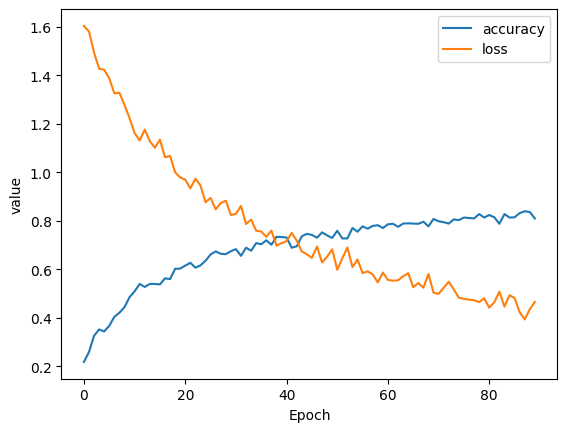

In [25]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.legend(["accuracy","loss"])
plt.xlabel("Epoch")
plt.ylabel("value")
plt.show()

In [8]:
model.save("weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
eval = model.evaluate(validation_dataset)


9/9 [==============================] - 6s 702ms/step - loss: 0.7924 - accuracy: 0.7171


In [10]:
ypred = model.predict(validation_dataset)
ypred

9/9 [==============================] - 5s 531ms/step


array([[6.0140394e-02, 4.8110974e-01, 2.7297236e-05, 6.3546032e-02,
        3.9517662e-01],
       [5.3230220e-01, 4.6159139e-01, 5.1771803e-04, 5.1049278e-03,
        4.8380077e-04],
       [5.2102946e-04, 3.5307214e-02, 9.1967535e-01, 7.9614104e-04,
        4.3700282e-02],
       ...,
       [9.8834753e-02, 8.6487120e-01, 6.6469656e-06, 1.2628390e-02,
        2.3659037e-02],
       [7.3936152e-01, 2.1743257e-01, 5.6123794e-03, 3.3990864e-02,
        3.6026884e-03],
       [6.5026260e-03, 8.7038743e-01, 2.9166473e-02, 7.8476362e-02,
        1.5467017e-02]], dtype=float32)

In [11]:
ypred.shape

(258, 5)

In [12]:
ypred_list = []
for i in range(258) :
    ypred_list.append(np.argmax(ypred[i]))

ypred_list

[1,
 0,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 0,
 3,
 1,
 0,
 4,
 4,
 3,
 0,
 2,
 4,
 3,
 2,
 3,
 3,
 4,
 3,
 2,
 4,
 3,
 0,
 4,
 3,
 0,
 0,
 3,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 3,
 0,
 2,
 1,
 2,
 4,
 3,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 0,
 3,
 3,
 3,
 2,
 3,
 0,
 1,
 2,
 0,
 2,
 3,
 4,
 2,
 3,
 3,
 0,
 3,
 0,
 1,
 4,
 1,
 4,
 4,
 2,
 3,
 0,
 4,
 1,
 0,
 4,
 2,
 4,
 4,
 2,
 4,
 0,
 2,
 1,
 4,
 3,
 4,
 3,
 0,
 4,
 4,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 3,
 2,
 4,
 0,
 4,
 2,
 1,
 4,
 4,
 3,
 1,
 2,
 1,
 4,
 4,
 4,
 1,
 4,
 1,
 2,
 2,
 2,
 1,
 0,
 4,
 2,
 4,
 2,
 1,
 4,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 4,
 1,
 3,
 4,
 1,
 3,
 0,
 2,
 4,
 1,
 1,
 2,
 3,
 3,
 1,
 4,
 0,
 4,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 3,
 3,
 4,
 1,
 0,
 4,
 1,
 2,
 1,
 4,
 2,
 0,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 4,
 3,
 3,
 3,
 1,
 4,
 0,
 2,
 3,
 4,
 0,
 2,
 0,
 4,
 0,
 0,
 2,
 3,
 0,
 3,
 3,
 4,
 4,
 2,
 2,
 3,
 1,
 1,
 4,
 4,
 1,
 0,
 2,
 2,
 0,
 1,
 4,
 1,
 0,
 4,
 3,
 3,
 3,
 1,
 1,
 2,
 4,
 1,
 4,
 0,


In [13]:
confm = confusion_matrix(y_true= validation_dataset.labels , y_pred= ypred_list )
confm

array([[12, 12, 14, 12,  7],
       [12,  9, 14, 14, 13],
       [ 6, 10,  9,  4, 13],
       [ 9, 10,  9,  9,  7],
       [11, 12,  9,  9, 12]])

In [14]:
validation_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

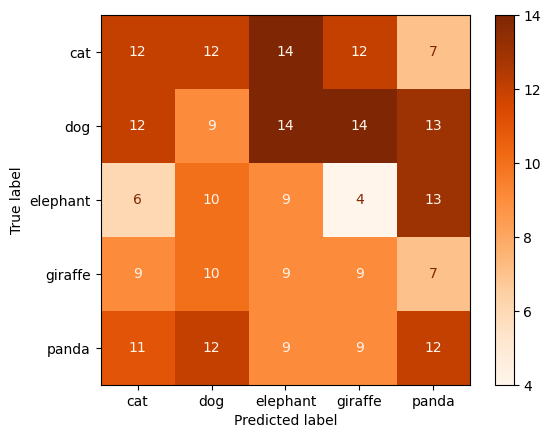

In [15]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confm, display_labels = ['cat','dog' , 'elephant', 'giraffe', 'panda'] )
cm_display.plot(cmap=plt.cm.Oranges)
plt.show()

## Inference

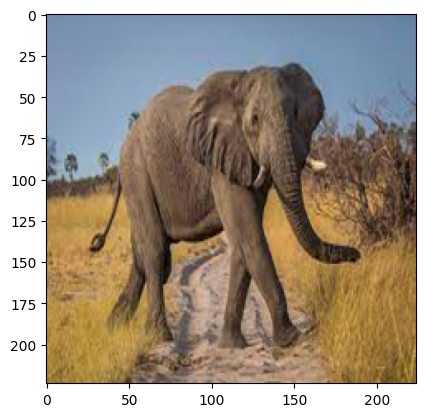

In [17]:
from PIL import Image

image = Image.open("/content/el2.jpg")
new_image = image.resize((224,224))
new_image.save("/content/el3.jpg")
plt.imshow(new_image)

In [18]:
new_image = cv2.imread("/content/el3.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
print(new_image.shape)
img = np.reshape(new_image, [1, 224, 224, 3])

output = model.predict(img)

predicted_class = np.argmax(output)
print(output)
print(predicted_class)
print(train_dataset.class_indices)
print(train_dataset.classes)
print(np.argmax(output))

if predicted_class == 0:
    print("😸🐈")
elif predicted_class == 1:
    print("🐕‍🦺🐕")
elif predicted_class == 2:
    print("🐘")
elif predicted_class == 3:
    print("🦒")
elif predicted_class == 4:
    print("🐼")

(224, 224, 3)
1/1 [==============================] - 0s 286ms/step
[[0. 0. 0. 0. 1.]]
4
{'cat': 0, 'dog': 1, 'elephant': 2, 'giraffe': 3, 'panda': 4}
[0 0 0 ... 4 4 4]
4
🐼


In [19]:
train_dataset.class_indices["elephant"]

2

In [20]:
predicted_class

4